# Deep Learning with CNNs - Rock Paper Scissors!

In [1]:
pip install -q tensorflow tensorflow-datasets

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'criteo',
 'cs_restaurants',
 'cura

## Dataset Info

In [4]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='~/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }"

## Preparing and training dataset with basic approach

In [5]:
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


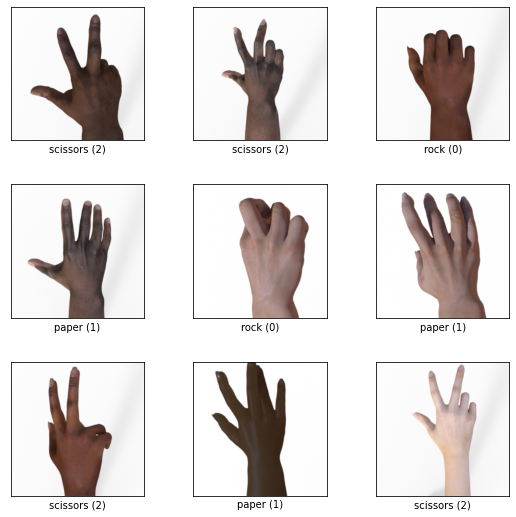

In [6]:
fig = tfds.show_examples(info, ds_train)

In [7]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [8]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

In [ ]:
model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/20
79/79 [==============================] - 2s 17ms/step - loss: 21.6934 - accuracy: 0.4385
Epoch 2/20
79/79 [==============================] - 1s 17ms/step - loss: 2.6423 - accuracy: 0.6520
Epoch 3/20
79/79 [==============================] - 1s 16ms/step - loss: 1.7840 - accuracy: 0.6425
Epoch 4/20
79/79 [==============================] - 1s 17ms/step - loss: 0.4270 - accuracy: 0.8524
Epoch 5/20
79/79 [==============================] - 1s 16ms/step - loss: 0.7478 - accuracy: 0.7802
Epoch 6/20
79/79 [==============================] - 1s 17ms/step - loss: 0.4071 - accuracy: 0.8623
Epoch 7/20
79/79 [==============================] - 1s 17ms/step - loss: 0.3061 - accuracy: 0.8960
Epoch 8/20
79/79 [==============================] - 1s 16ms/step - loss: 0.2304 - accuracy: 0.9159
Epoch 9/20
79/79 [==============================] - 1s 17ms/step - loss: 0.6859 - accuracy: 0.8226
Epoch 10/20
79/79 [==============================] - 1s 17ms/step - loss: 0.4017 - accuracy: 0.8556
Epoch 11

In [ ]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 8ms/step - loss: 2.5260 - accuracy: 0.4543


[2.52595591545105, 0.4543010890483856]

## Using CNN

In [26]:
model = keras.Sequential([
   keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.Flatten(),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=15, batch_size=32)

Epoch 1/15
79/79 [==============================] - 14s 178ms/step - loss: 2.9084 - accuracy: 0.7385
Epoch 2/15
79/79 [==============================] - 13s 162ms/step - loss: 0.2523 - accuracy: 0.9599
Epoch 3/15
79/79 [==============================] - 13s 162ms/step - loss: 0.0219 - accuracy: 0.9960
Epoch 4/15
79/79 [==============================] - 13s 162ms/step - loss: 0.1511 - accuracy: 0.9698
Epoch 5/15
79/79 [==============================] - 13s 162ms/step - loss: 6.1906e-04 - accuracy: 1.0000
Epoch 7/15
79/79 [==============================] - 13s 162ms/step - loss: 2.8506e-04 - accuracy: 1.0000
Epoch 8/15
79/79 [==============================] - 13s 162ms/step - loss: 2.3469e-04 - accuracy: 1.0000
Epoch 9/15
79/79 [==============================] - 13s 162ms/step - loss: 1.4100e-04 - accuracy: 1.0000
Epoch 10/15
79/79 [==============================] - 13s 162ms/step - loss: 1.1529e-04 - accuracy: 1.0000
Epoch 11/15
79/79 [==============================] - 13s 162ms/step - 

In [27]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 105ms/step - loss: 2.3305 - accuracy: 0.5672


[2.3305344581604004, 0.5672042965888977]

As can be seen, the CNN is slightly better. However we will try to optimize this

In [28]:
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/20
79/79 [==============================] - 3s 32ms/step - loss: 0.8266 - accuracy: 0.7056
Epoch 2/20
79/79 [==============================] - 2s 29ms/step - loss: 0.0900 - accuracy: 0.9817
Epoch 3/20
79/79 [==============================] - 2s 29ms/step - loss: 0.0165 - accuracy: 0.9956
Epoch 4/20
79/79 [==============================] - 2s 29ms/step - loss: 0.0090 - accuracy: 0.9980
Epoch 5/20
79/79 [==============================] - 2s 29ms/step - loss: 0.0043 - accuracy: 0.9992
Epoch 6/20
79/79 [==============================] - 2s 29ms/step - loss: 0.0043 - accuracy: 0.9996
Epoch 7/20
79/79 [==============================] - 2s 29ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 8/20
79/79 [==============================] - 2s 29ms/step - loss: 0.0026 - accuracy: 0.9996
Epoch 9/20
79/79 [==============================] - 2s 29ms/step - loss: 7.9811e-04 - accuracy: 1.0000
Epoch 10/20
79/79 [==============================] - 2s 29ms/step - loss: 3.7054e-04 - accuracy: 1.0000
E

In [29]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 1s 28ms/step - loss: 2.1890 - accuracy: 0.6855


[2.1889729499816895, 0.6854838728904724]

Using AveragePooling and MaxPooling we have been able to get the accuracy up to 68.5%. Now tuning different parameters, we will see the effects they have on the accuracy

## Part B - Activation Function

We are changing the activation function from relu to sigmoid and will identify the difference

In [9]:
model = keras.Sequential([
   keras.layers.Conv2D(64, 3, activation='sigmoid', input_shape=(300,300,1)),
   keras.layers.Conv2D(32, 3, activation='sigmoid'),
   keras.layers.Flatten(),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/20
79/79 [==============================] - 24s 175ms/step - loss: 94.2928 - accuracy: 0.3337
Epoch 2/20
79/79 [==============================] - 13s 159ms/step - loss: 1.0996 - accuracy: 0.3373
Epoch 3/20
79/79 [==============================] - 13s 161ms/step - loss: 1.0959 - accuracy: 0.3484
Epoch 4/20
79/79 [==============================] - 13s 161ms/step - loss: 1.0946 - accuracy: 0.3591
Epoch 5/20
79/79 [==============================] - 13s 162ms/step - loss: 1.0912 - accuracy: 0.4873
Epoch 6/20
79/79 [==============================] - 13s 163ms/step - loss: 1.0887 - accuracy: 0.4429
Epoch 7/20
79/79 [==============================] - 13s 164ms/step - loss: 1.0869 - accuracy: 0.4242
Epoch 8/20
79/79 [==============================] - 13s 163ms/step - loss: 1.0836 - accuracy: 0.4075
Epoch 9/20
79/79 [==============================] - 13s 164ms/step - loss: 1.0789 - accuracy: 0.4583
Epoch 10/20
79/79 [==============================] - 13s 164ms/step - loss: 1.0742 - accur

In [10]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 1s 108ms/step - loss: 1.0520 - accuracy: 0.5108


[1.0519835948944092, 0.5107526779174805]

Using the sigmoid activation function has reduced the accuracy to 51.08%

## Part C - Cost Function

We are changing the cost function from Sparse Categorical Cross Entropy to Mean Squared Error

In [10]:
model = keras.Sequential([
   keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.Flatten(),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/20
79/79 [==============================] - 13s 158ms/step - loss: 1.3304 - accuracy: 0.3333
Epoch 2/20
79/79 [==============================] - 13s 160ms/step - loss: 1.3333 - accuracy: 0.3333
Epoch 3/20
79/79 [==============================] - 13s 162ms/step - loss: 1.3333 - accuracy: 0.3333
Epoch 4/20
79/79 [==============================] - 13s 162ms/step - loss: 1.3333 - accuracy: 0.3333
Epoch 5/20
79/79 [==============================] - 13s 162ms/step - loss: 1.3333 - accuracy: 0.3333
Epoch 6/20
79/79 [==============================] - 13s 161ms/step - loss: 1.3333 - accuracy: 0.3333
Epoch 7/20
79/79 [==============================] - 13s 161ms/step - loss: 1.3333 - accuracy: 0.3333
Epoch 8/20
79/79 [==============================] - 13s 160ms/step - loss: 1.3333 - accuracy: 0.3333
Epoch 9/20
79/79 [==============================] - 13s 161ms/step - loss: 1.3333 - accuracy: 0.3333
Epoch 10/20
79/79 [==============================] - 13s 162ms/step - loss: 1.3333 - accura

In [12]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 0s 27ms/step - loss: 1.5587 - accuracy: 0.7392


[1.558727502822876, 0.7392473220825195]

Using MSE has increased the accuracy quite a bit to almost 74%

# Part D - Epochs

We are increasing the number of epochs to 50 from 20

In [13]:
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=50, batch_size=32)

Epoch 1/50
79/79 [==============================] - 3s 29ms/step - loss: 0.9399 - accuracy: 0.6337
Epoch 2/50
79/79 [==============================] - 2s 29ms/step - loss: 0.0981 - accuracy: 0.9794
Epoch 3/50
79/79 [==============================] - 2s 29ms/step - loss: 0.0244 - accuracy: 0.9960
Epoch 4/50
79/79 [==============================] - 2s 29ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 5/50
79/79 [==============================] - 2s 29ms/step - loss: 0.0030 - accuracy: 0.9996
Epoch 6/50
79/79 [==============================] - 2s 29ms/step - loss: 0.0098 - accuracy: 0.9988
Epoch 7/50
79/79 [==============================] - 2s 29ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8/50
79/79 [==============================] - 2s 29ms/step - loss: 0.0315 - accuracy: 0.9925
Epoch 9/50
79/79 [==============================] - 2s 29ms/step - loss: 0.0092 - accuracy: 0.9976
Epoch 10/50
79/79 [==============================] - 2s 29ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 11/

In [14]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 0s 16ms/step - loss: 2.5668 - accuracy: 0.7043


[2.5668327808380127, 0.7043010592460632]

Increasing the number of epochs has increased the accuracy of the model to about 70.5%

# Part E - Gradient Estimation

Chaning the gradient estimation from Adam to RMSprop

In [15]:
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='RMSprop',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/20
79/79 [==============================] - 3s 31ms/step - loss: 1.6630 - accuracy: 0.5476
Epoch 2/20
79/79 [==============================] - 2s 31ms/step - loss: 0.3779 - accuracy: 0.9000
Epoch 3/20
79/79 [==============================] - 2s 30ms/step - loss: 0.0993 - accuracy: 0.9679
Epoch 4/20
79/79 [==============================] - 2s 31ms/step - loss: 0.4294 - accuracy: 0.9571
Epoch 5/20
79/79 [==============================] - 2s 30ms/step - loss: 0.1671 - accuracy: 0.9810
Epoch 6/20
79/79 [==============================] - 2s 31ms/step - loss: 0.1607 - accuracy: 0.9849
Epoch 7/20
79/79 [==============================] - 2s 31ms/step - loss: 0.0724 - accuracy: 0.9857
Epoch 8/20
79/79 [==============================] - 2s 31ms/step - loss: 0.3833 - accuracy: 0.9806
Epoch 9/20
79/79 [==============================] - 2s 31ms/step - loss: 0.1153 - accuracy: 0.9865
Epoch 10/20
79/79 [==============================] - 2s 30ms/step - loss: 0.1481 - accuracy: 0.9889
Epoch 11/

In [16]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 0s 16ms/step - loss: 2.5698 - accuracy: 0.5833


[2.5697638988494873, 0.5833333134651184]

Changing the gradient estimation to RMSprop has reduced the accuracy of the model

## Part F - Network Architecture

We are adding another layer and testing out the difference

In [17]:
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
   keras.layers.Conv2D(128, 3, activation='relu'),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/20
79/79 [==============================] - 7s 65ms/step - loss: 0.8655 - accuracy: 0.5893
Epoch 2/20
79/79 [==============================] - 4s 55ms/step - loss: 0.1072 - accuracy: 0.9675
Epoch 3/20
79/79 [==============================] - 4s 55ms/step - loss: 0.0479 - accuracy: 0.9857
Epoch 4/20
79/79 [==============================] - 4s 55ms/step - loss: 0.0126 - accuracy: 0.9964
Epoch 5/20
79/79 [==============================] - 4s 55ms/step - loss: 0.0333 - accuracy: 0.9929
Epoch 6/20
79/79 [==============================] - 4s 55ms/step - loss: 0.0029 - accuracy: 0.9996
Epoch 7/20
79/79 [==============================] - 4s 56ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 8/20
79/79 [==============================] - 4s 55ms/step - loss: 3.1029e-04 - accuracy: 1.0000
Epoch 9/20
79/79 [==============================] - 4s 55ms/step - loss: 2.1199e-04 - accuracy: 1.0000
Epoch 10/20
79/79 [==============================] - 4s 56ms/step - loss: 1.6357e-04 - accuracy: 1.00

In [18]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 1s 55ms/step - loss: 1.6544 - accuracy: 0.5887


[1.6544067859649658, 0.5887096524238586]

The added layer reduces the accuracy of the model as can be seen above

# Part G - Network Initialization

We are adding an initializer to the model which is HeNormal

In [21]:
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
   keras.layers.Conv2D(64, 3, activation='relu', kernel_initializer=keras.initializers.HeNormal()),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/20
79/79 [==============================] - 3s 29ms/step - loss: 3.2658 - accuracy: 0.8103
Epoch 2/20
79/79 [==============================] - 2s 29ms/step - loss: 0.0589 - accuracy: 0.9869
Epoch 3/20
79/79 [==============================] - 2s 29ms/step - loss: 0.1330 - accuracy: 0.9583
Epoch 4/20
79/79 [==============================] - 2s 29ms/step - loss: 0.0311 - accuracy: 0.9905
Epoch 5/20
79/79 [==============================] - 2s 29ms/step - loss: 0.0239 - accuracy: 0.9948
Epoch 6/20
79/79 [==============================] - 2s 29ms/step - loss: 0.0129 - accuracy: 0.9968
Epoch 7/20
79/79 [==============================] - 2s 29ms/step - loss: 0.0123 - accuracy: 0.9972
Epoch 8/20
79/79 [==============================] - 2s 29ms/step - loss: 0.0044 - accuracy: 0.9984
Epoch 9/20
79/79 [==============================] - 2s 29ms/step - loss: 0.0117 - accuracy: 0.9968
Epoch 10/20
79/79 [==============================] - 2s 29ms/step - loss: 0.0031 - accuracy: 0.9996
Epoch 11/

In [22]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 0s 16ms/step - loss: 3.1233 - accuracy: 0.7312


[3.12326717376709, 0.7311828136444092]

The initializer increases the accuracy of the model to 73.12%

## References

1.   https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters
2.   https://www.youtube.com/watch?v=pSexXMdruFM
3.   https://www.youtube.com/watch?v=ycxulUVoNbk
4. https://keras.io/api/losses/regression_losses/#meansquarederror-class
5. https://keras.io/api/layers/initializers/#henormal-class
6. https://laurencemoroney.com/datasets.html
7. https://www.deeplearning.ai/ai-notes/initialization/index.html
8. https://www.tensorflow.org/datasets/overview

## License

Copyright (c) 2022 Jay Devnani

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.